# Module 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

# 2.1
#### Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
#### Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.

In [2]:
dataset=pd.read_csv("Week2.csv")

In [3]:
dataset.dtypes

Unnamed: 0                  int64
Symbol                     object
Series                     object
Date                       object
Prev Close                float64
Open Price                float64
High Price                float64
Low Price                 float64
Last Price                float64
Close Price               float64
Average Price             float64
Total Traded Quantity       int64
Turnover                  float64
No. of Trades               int64
Deliverable Qty             int64
% Dly Qt to Traded Qty    float64
Month                       int64
Year                        int64
Day_Perc_Change           float64
Trend                      object
dtype: object

In [4]:
dataset["Date"]=pd.to_datetime(dataset["Date"])

Text(0.5, 1.0, 'General Outlook of the Stock')

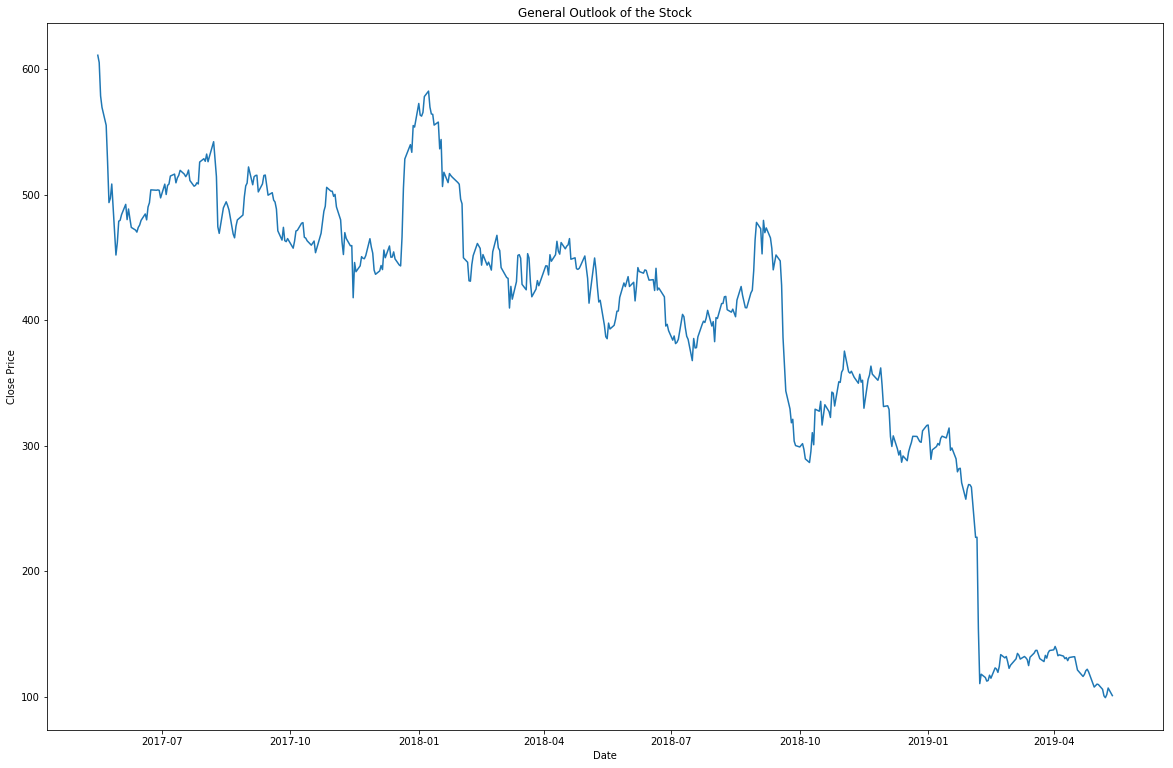

In [42]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 13
plt.rcParams["figure.figsize"] = fig_size
plt.plot(dataset['Date'],dataset['Close Price'])
plt.xlabel('Date')
plt.ylabel("Close Price")
plt.title('General Outlook of the Stock')



### Trends
On June 7,2018 Reliance Industries limited has the "Fourty first annual general meeting (post IPO)" that impacted on the sudden change in the plot(decreased the close price)

On February 4,Reliance acquired shares and control of Den network limited.

On Februart 8,acquisition of additional holding in Future 101 Design Private Limited and Genesis Colors Limited

# 2.2
#### A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.

Display a stem plot of the daily change in of the stock price in percentage. This column was calculated in module 1 and should be already available in week2.csv. Observe whenever there's a large change

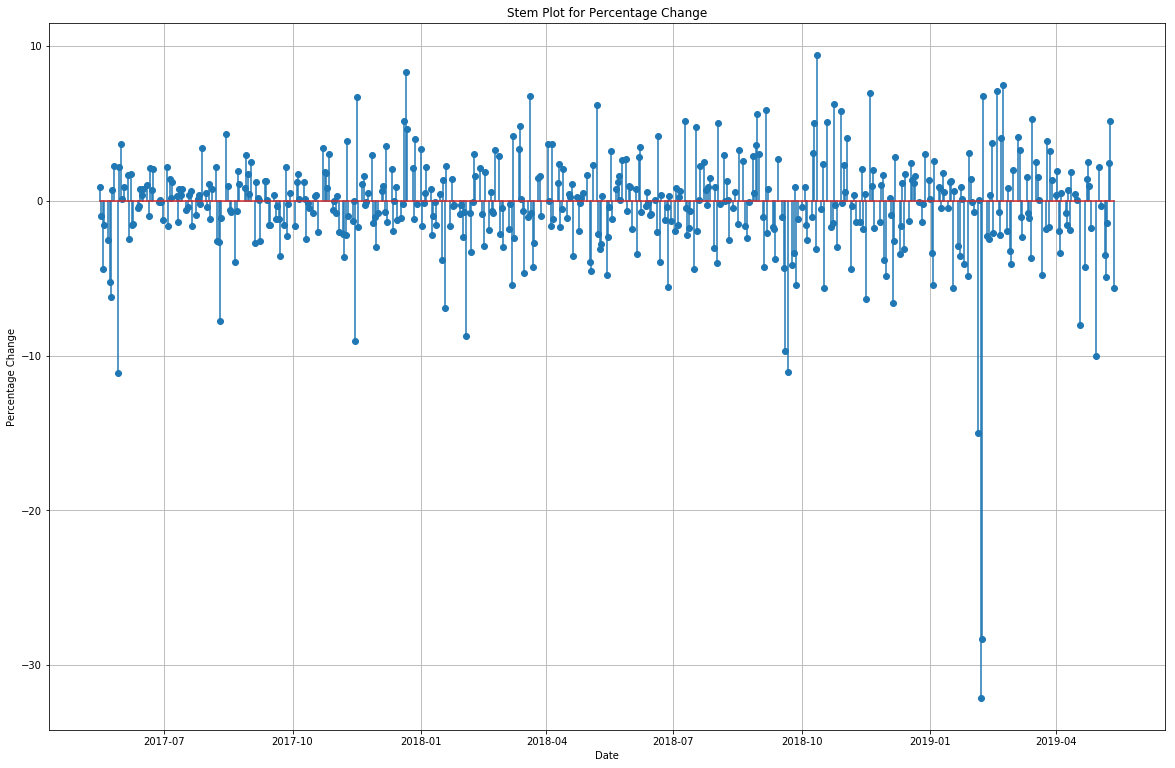

In [6]:
plt.stem(dataset['Date'],dataset['Day_Perc_Change'])
plt.ylabel('Percentage Change')
plt.xlabel('Date')
plt.grid()
plt.title('Stem Plot for Percentage Change')
plt.show()

# 2.3
#### Plot the daily volumes as well and compare the percentage stem plot to it. Document your analysis of the relationship between volume and daily percentage change.

On 7 February,2019 there was a dip of near -32 % due to acquisition of some companies by Reliance limited.

Text(0.5, 1.0, 'General Outlook of the Stock')

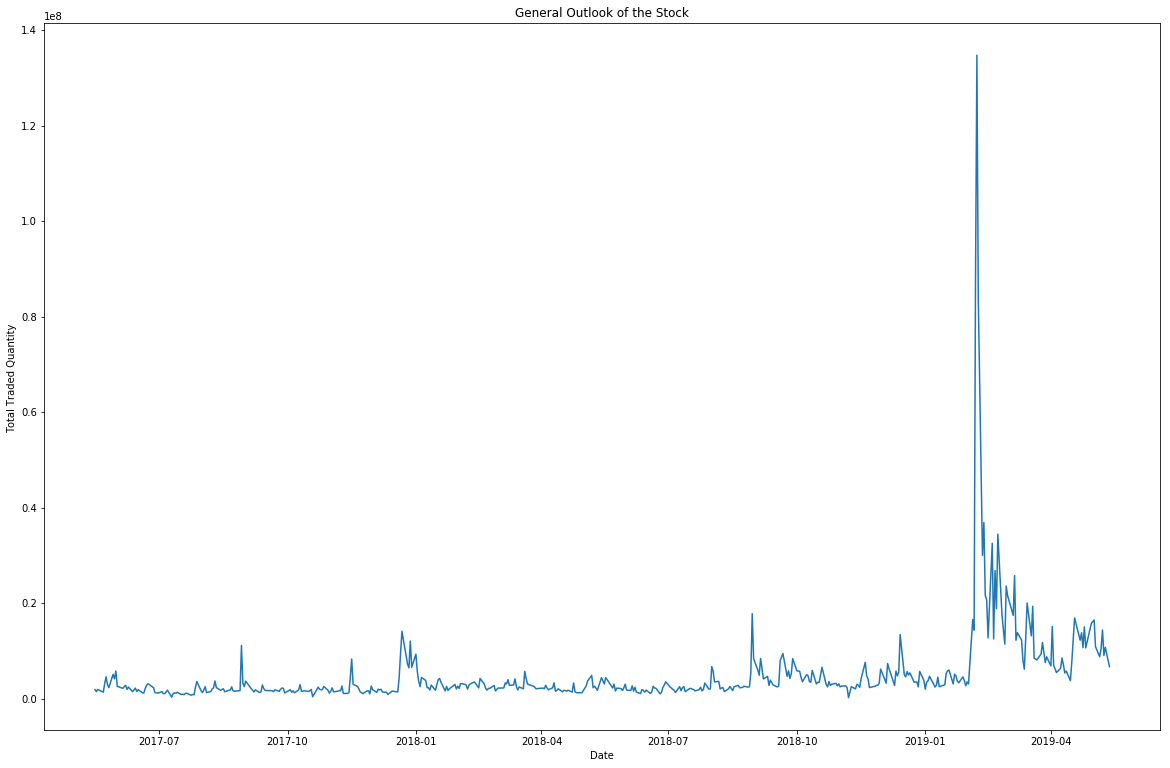

In [7]:
plt.plot(dataset['Date'],dataset['Total Traded Quantity'])
plt.xlabel('Date')
plt.ylabel("Total Traded Quantity ")
plt.title('General Outlook of the Stock')


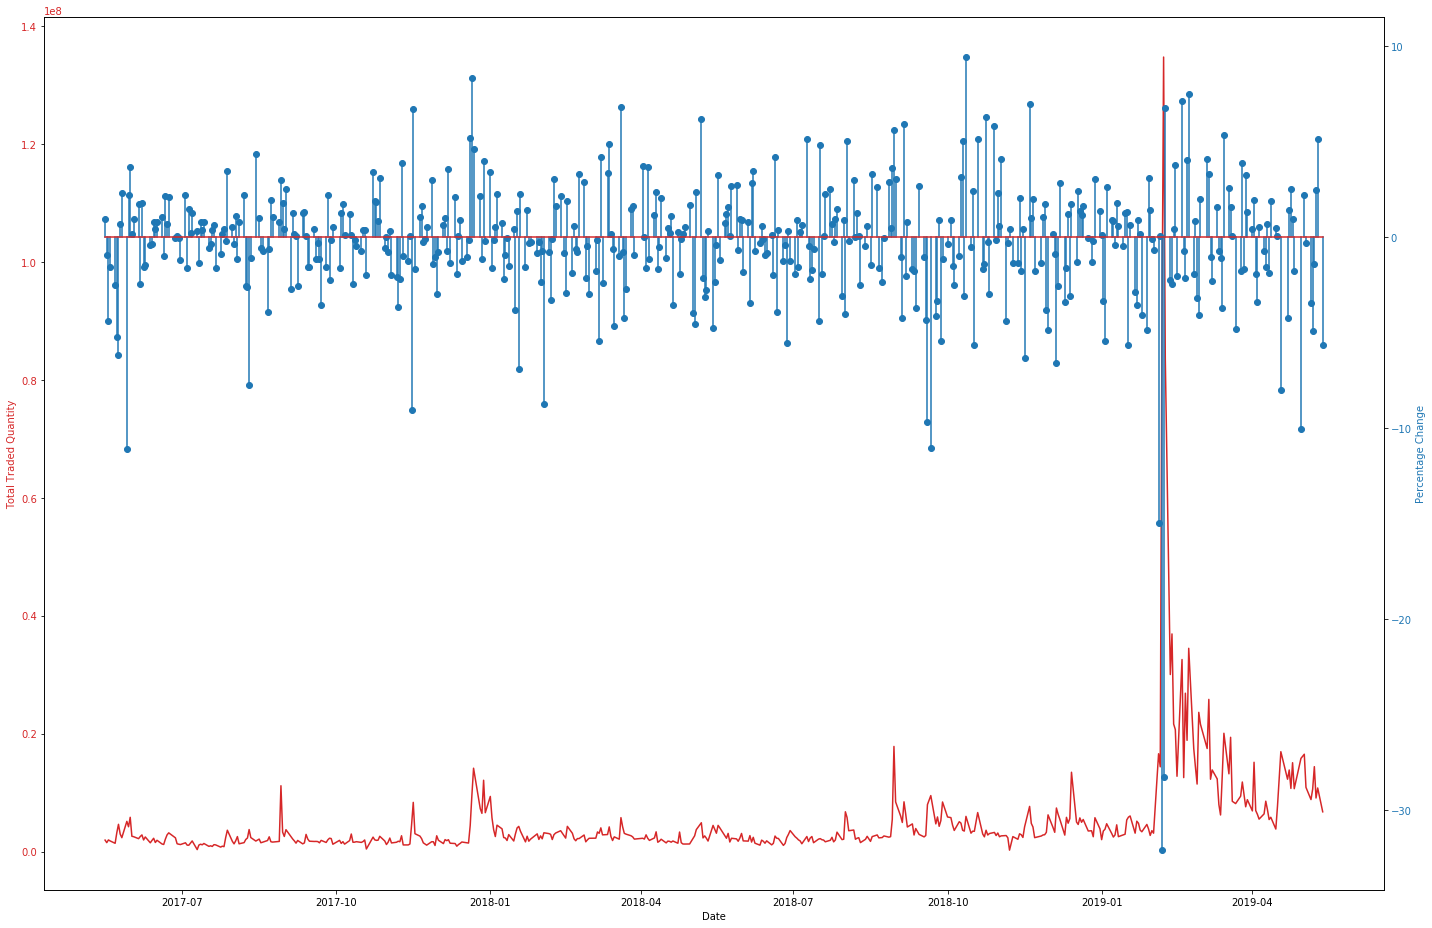

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Traded Quantity', color=color)
ax1.plot(dataset['Date'], dataset['Total Traded Quantity'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Percentage Change', color=color)  # we already handled the x-label with ax1
ax2.stem(dataset['Date'], dataset['Day_Perc_Change'])
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

As we can see in the above plot whenever the price of stock decreases total volume traded increases.So we can make a conclusion that whenever price of stock decrease people will buy more stocks.

# 2.4
#### We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type.

In [9]:
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [10]:
df2=dataset.groupby('Trend').count()

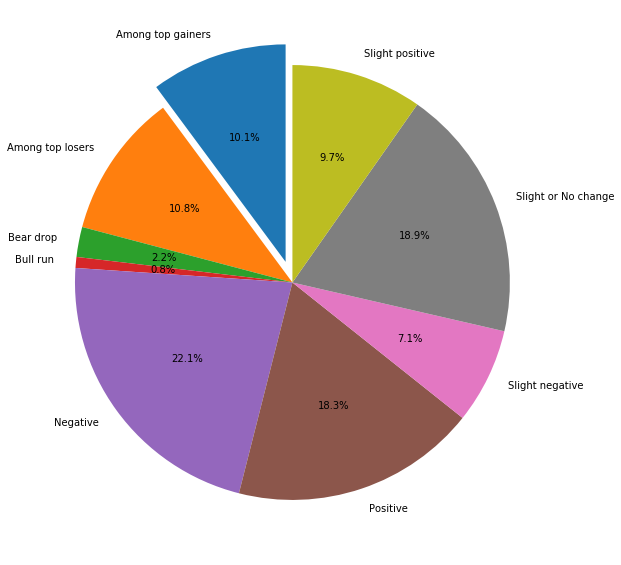

In [11]:
explode=[0.1,0,0,0,0,0,0,0,0]
fig_size[0] = 17
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.pie(df2['Symbol'], labels=df2.index,explode=explode,  startangle=90, autopct='%.1f%%')
plt.show()

Text(0, 0.5, 'Total Traded Quantity(Median)')

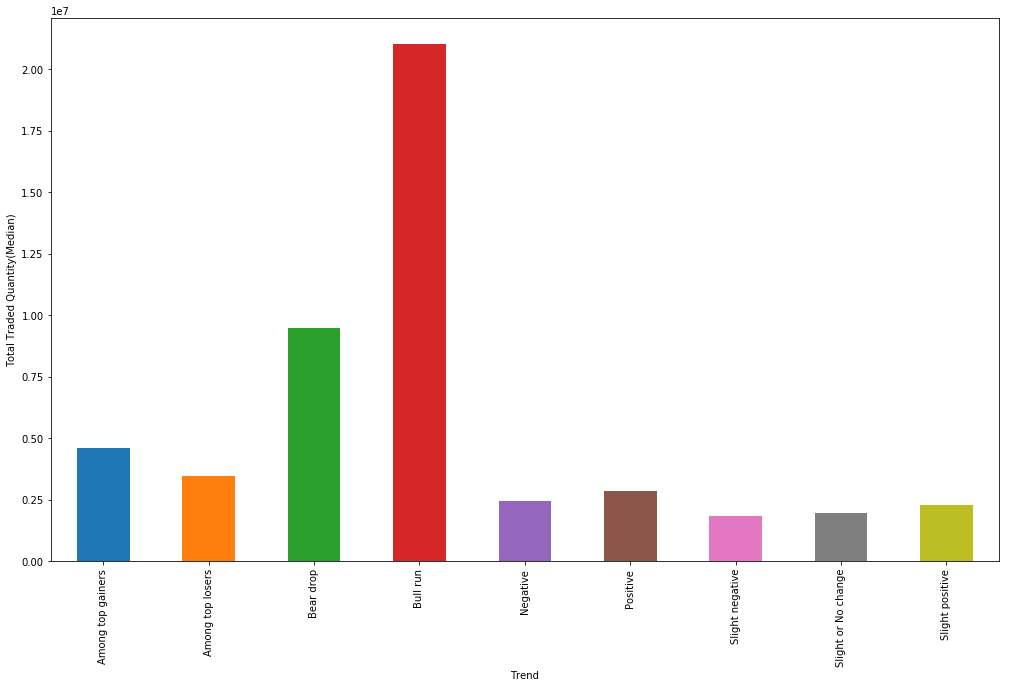

In [12]:
dataset2=dataset.groupby(['Trend'])['Total Traded Quantity'].median()
ax=dataset2.plot.bar()
ax.set_ylabel("Total Traded Quantity(Median)")

Text(0, 0.5, 'Total Traded Quantity(Average)')

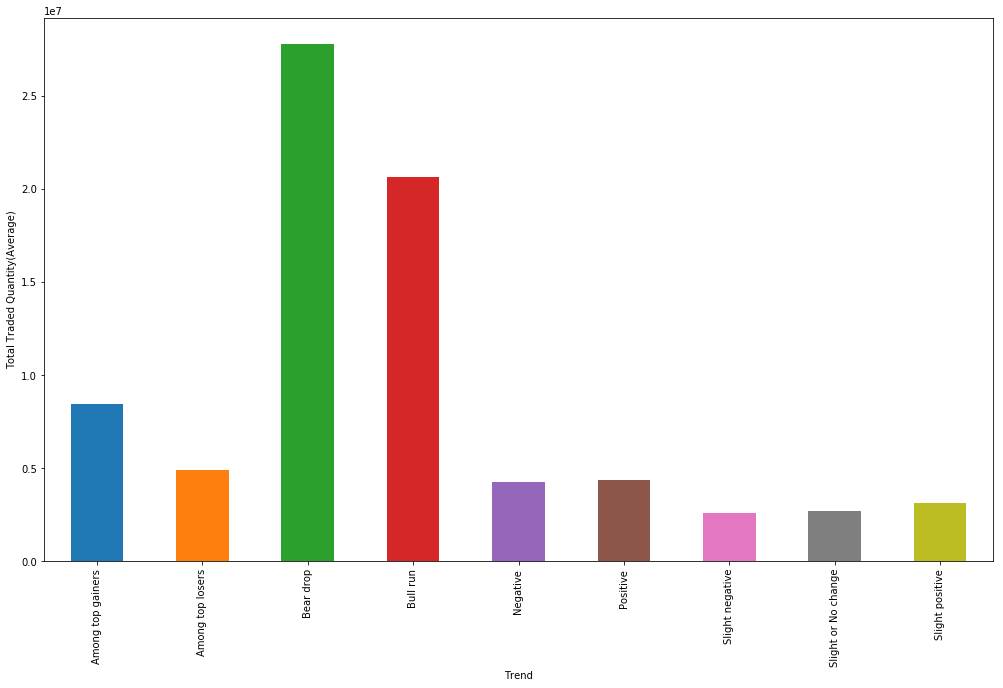

In [13]:
dataset2=dataset.groupby(['Trend'])['Total Traded Quantity'].mean()
ax=dataset2.plot.bar()
ax.set_ylabel("Total Traded Quantity(Average)")

# 2.5
#### Plot the daily return (percentage) distribution as a histogram.
Histogram analysis is one of the most fundamental methods of exploratory data analysis. In this case, it'd return a frequency plot of various values of percentage changes 

In [14]:
dataset2=dataset
dataset2['daily return']=(dataset['Open Price']-dataset['Close Price'])/dataset['Open Price']*100

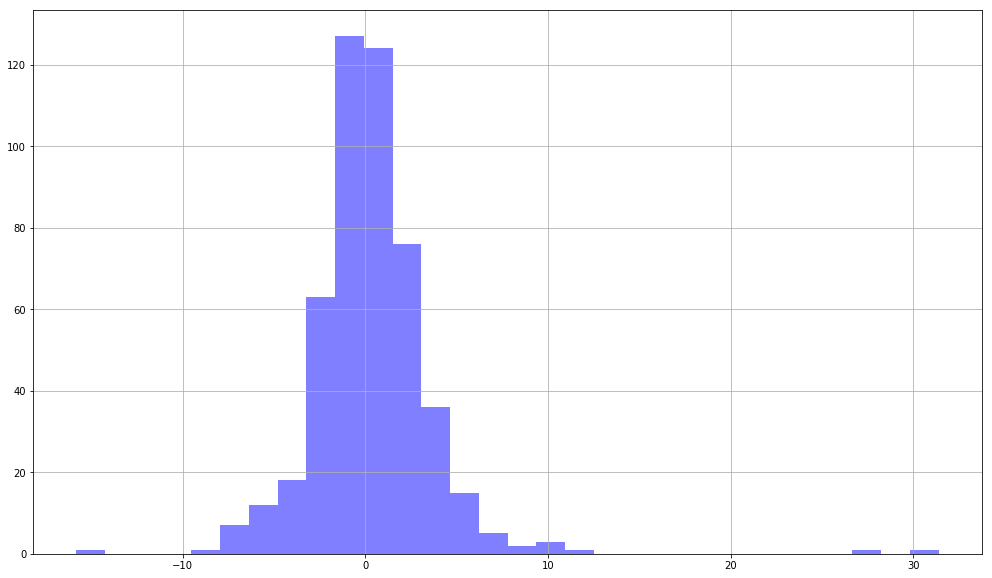

In [15]:
plt.hist(dataset2['daily return'], bins=30, facecolor='blue', alpha=0.5)
plt.grid(True)

# 2.6
#### We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

#### Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification.

In [16]:
bajaj=pd.read_csv("BAJAJELEC.csv")
suzlon=pd.read_csv("SUZLON.csv")
jetair=pd.read_csv("JETAIRWAYS.csv")
jklakshmi=pd.read_csv("JKLAKSHMI.csv")
rcom=pd.read_csv("RCOM.csv")

In [17]:
print(str(bajaj['Series'].nunique()) +" " + bajaj['Series'].unique() )
print(str(suzlon['Series'].nunique()) +" "+ suzlon['Series'].unique())
print(str(jetair['Series'].nunique()) + " "+jetair['Series'].unique())
print(str(jklakshmi['Series'].nunique())+" "+jklakshmi['Series'].unique())
print(str(rcom['Series'].nunique())+" "+rcom['Series'].unique())

['1 EQ']
['1 EQ']
['1 EQ']
['1 EQ']
['1 EQ']


In [18]:
df=pd.DataFrame()
df['Bajaj']=bajaj['Close Price']
df['Suzlon']=suzlon['Close Price']
df['Jetair']=jetair['Close Price']
df['JKlakshmi']=jklakshmi['Close Price']
df['RCOM']=rcom['Close Price']
df

,Bajaj,Suzlon,Jetair,JKlakshmi,RCOM
0,341.15,19.60,527.50,510.80,32.00
1,347.00,19.70,534.15,527.50,32.10
2,349.85,19.90,528.90,516.20,31.95
3,334.10,20.00,522.70,478.95,31.05
4,336.20,20.60,520.40,469.55,30.55
5,313.25,20.40,475.65,475.75,29.80
6,315.55,19.75,472.85,485.60,28.00
7,327.95,18.85,464.80,481.90,25.90
8,346.20,19.35,468.95,478.05,25.95
9,359.45,19.80,483.40,481.15,25.75


In [19]:
df1=df.pct_change()*100

In [20]:
df1.dropna()

,Bajaj,Suzlon,Jetair,JKlakshmi,RCOM
1,1.714788,0.510204,1.260664,3.269381,0.312500
2,0.821326,1.015228,-0.982870,-2.142180,-0.467290
3,-4.501929,0.502513,-1.172244,-7.216195,-2.816901
4,0.628554,3.000000,-0.440023,-1.962627,-1.610306
5,-6.826294,-0.970874,-8.599154,1.320413,-2.454992
6,0.734238,-3.186275,-0.588668,2.070415,-6.040268
7,3.929647,-4.556962,-1.702443,-0.761944,-7.500000
8,5.564873,2.652520,0.892857,-0.798921,0.193050
9,3.827267,2.325581,3.081352,0.648468,-0.770713
10,-2.990680,-3.282828,-1.820439,3.148706,-20.388350


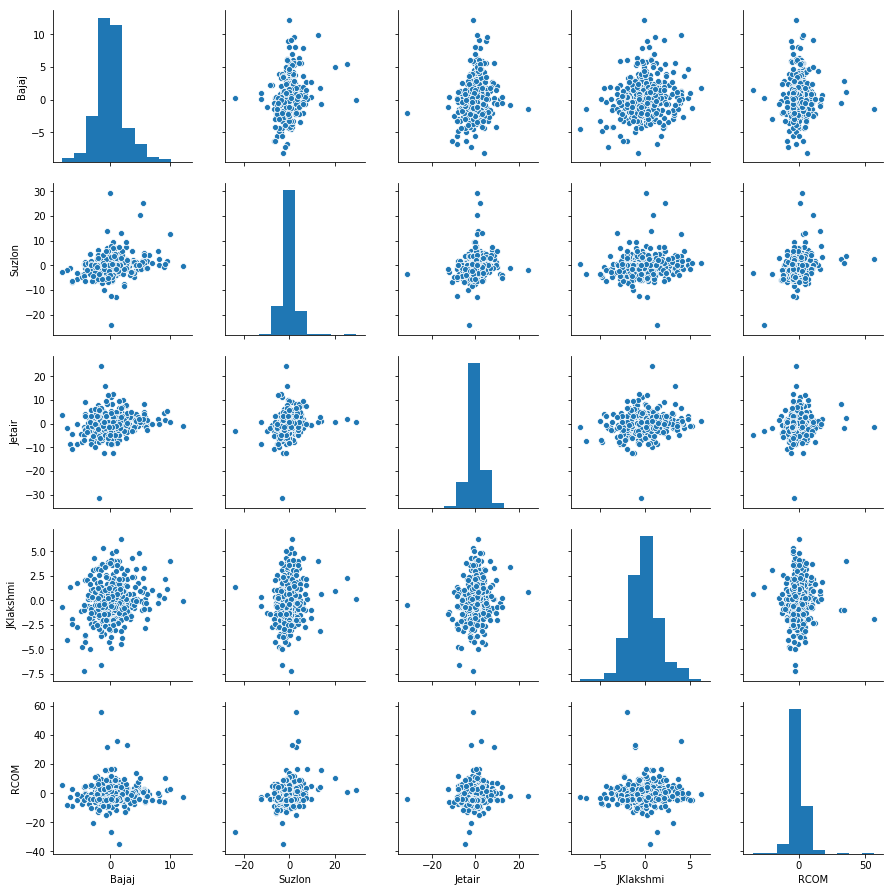

In [21]:
sns.pairplot(df1)



# 2.7
#### Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.
You have already calculated the percentage changes in several stock prices. Calculate the 7 day rolling average of the percentage change of any of the stock prices, then compute the standard deviation (which is the square root of the variance) and plot the values.
Note: pandas provides a rolling() function for dataframes and a std() function also which you can use

In [23]:
rolling_mean = df1.rolling(window=7).mean()
rolling_std= df1.rolling(window=7).std() *np.sqrt(7)

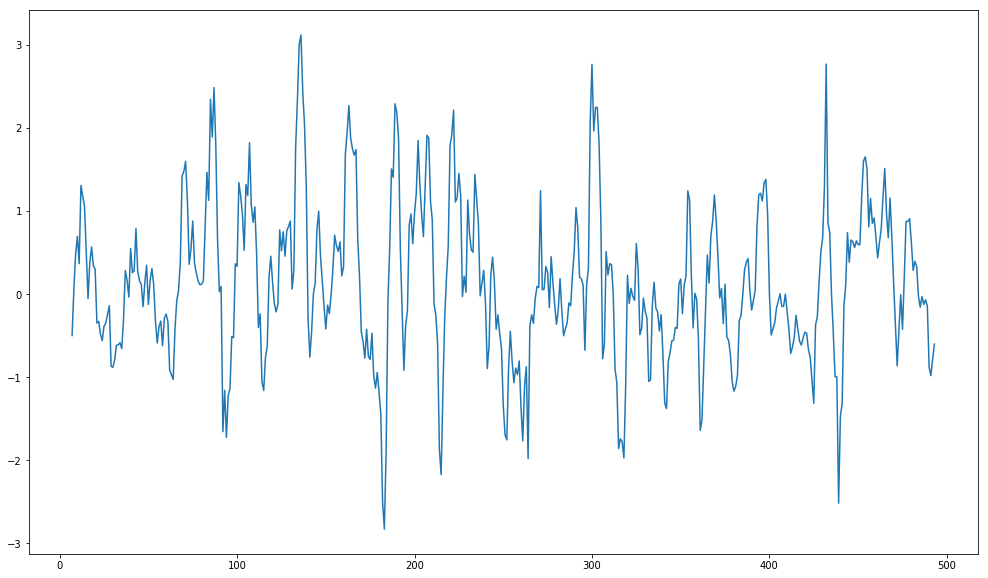

In [24]:
plt.plot(rolling_mean['Bajaj'])

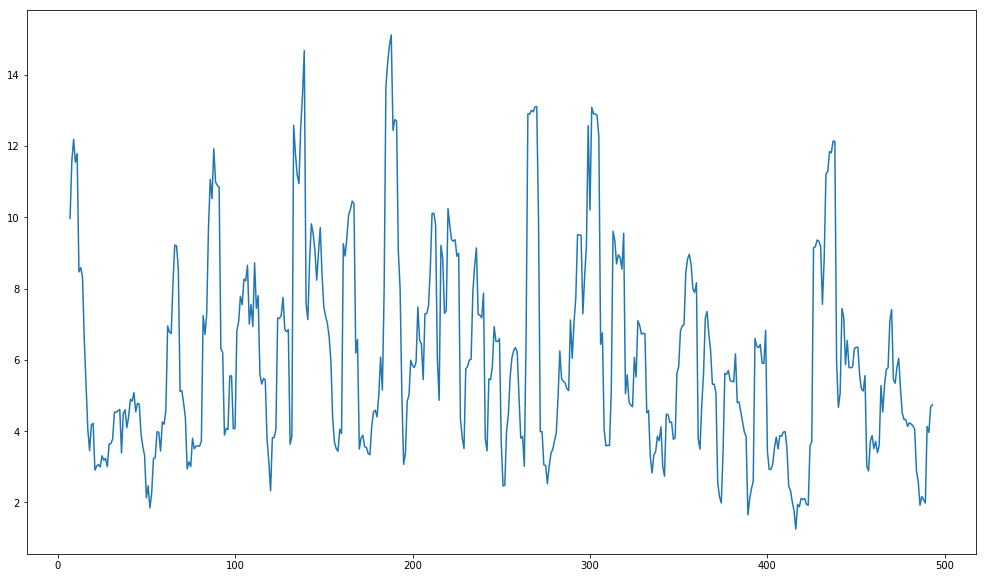

In [25]:
plt.plot(rolling_std['Bajaj'])

# 2.8 
#### Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta' ( We'll be covering this in length in Module 3) 

In [26]:
nifty=pd.read_csv('Nifty50.csv')

In [27]:
df2=pd.DataFrame()
df2['Close']=nifty['Close']

In [28]:
df2=df2.pct_change()*100

In [31]:
rolling_mean_nifty = df2.rolling(window=7).mean()
rolling_std_nifty= df2.rolling(window=7).std() * np.sqrt(7)

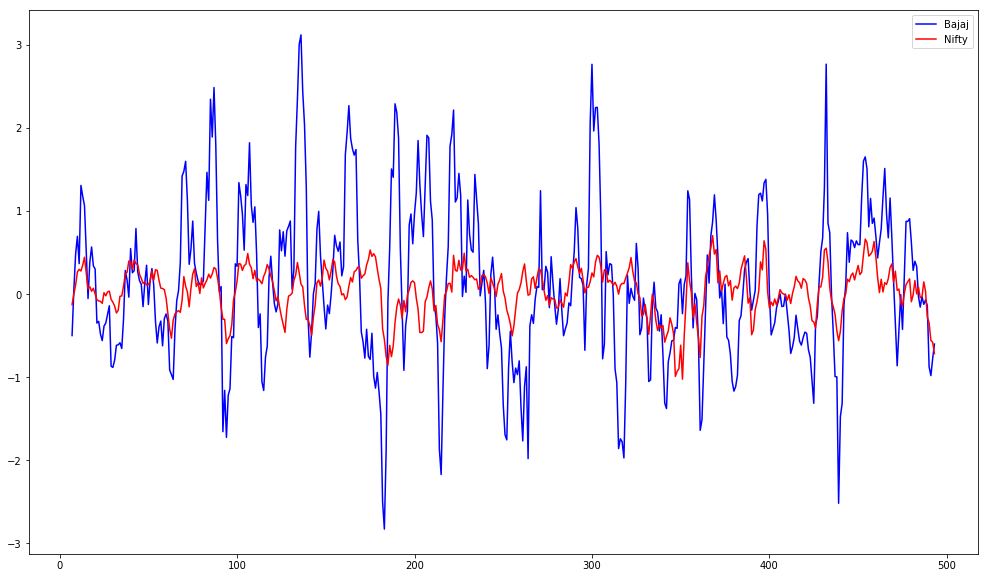

In [32]:

fig, ax = plt.subplots()
ax.plot(rolling_mean['Bajaj'], '-b', label='Bajaj')
ax.plot(rolling_mean_nifty, '-r', label='Nifty')
leg = ax.legend();

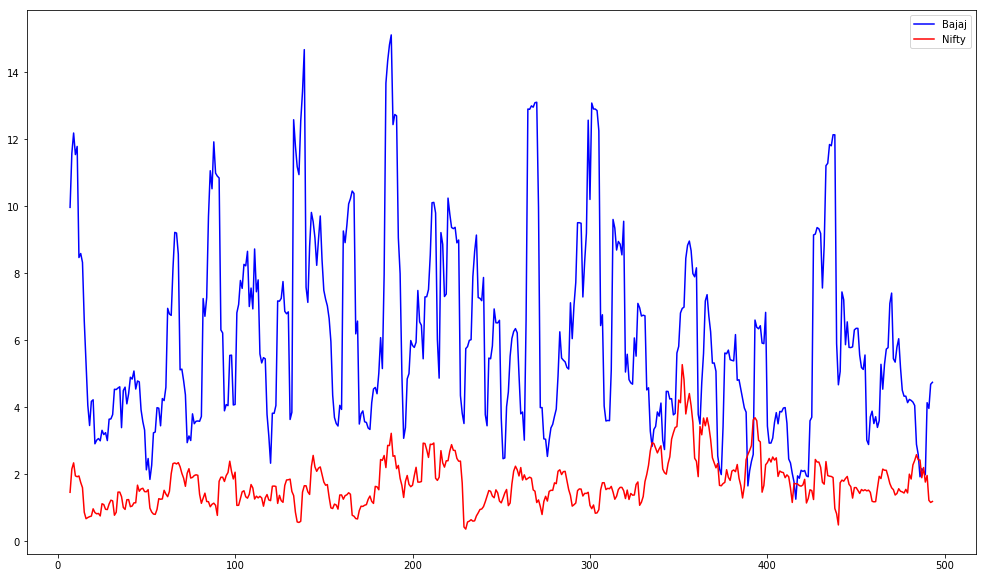

In [33]:
fig, ax = plt.subplots()
ax.plot(rolling_std['Bajaj'], '-b', label='Bajaj')
ax.plot(rolling_std_nifty, '-r', label='Nifty')
leg = ax.legend();

# 2.9
### Trade Calls - Using Simple Moving Averages. Study about moving averages here. 
 
#### Plot the 21 day and 34 day Moving average with the average price and decide a Call ! 
Call should be buy whenever the smaller moving average (21) crosses over longer moving average (34) AND the call should be sell whenever smaller moving average crosses under longer moving average. 
One of the most widely used technical indicators.

In [34]:
data=pd.DataFrame()
data['Date']=bajaj['Date']
data['Average']=bajaj['Average Price']

In [35]:
data = data.reindex(index=data.index[::-1]) # Reverse for the moving average computation
data['Mavg21'] = data['Average'].rolling(window=21).mean()
data['Mavg34'] = data['Average'].rolling(window=34).mean()

In [36]:
prev_short_mavg = data['Mavg21'].shift(1)
prev_long_mavg = data['Mavg34'].shift(1)
 
# Select buying and selling signals: where moving averages cross
sells = data.ix[(data['Mavg21'] <= data['Mavg34']) & (prev_short_mavg >= prev_long_mavg)]
buys = data.ix[(data['Mavg21'] >= data['Mavg34']) & (prev_short_mavg <= prev_long_mavg)]

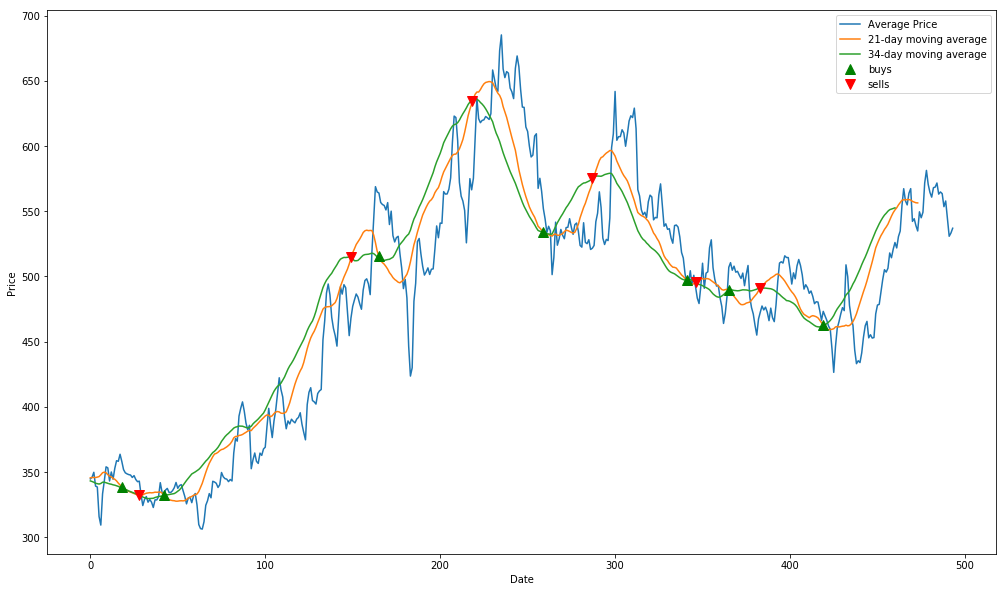

In [37]:
plt.plot(data.index, data['Average'], label='Average Price')
plt.plot(data.index, data['Mavg21'], label='21-day moving average')
plt.plot(data.index, data['Mavg34'], label='34-day moving average')
plt.plot(buys.index, data.ix[buys.index]['Mavg21'], '^', markersize=10, color='g',label='buys')
plt.plot(sells.index, data.ix[sells.index]['Mavg34'], 'v', markersize=10, color='r',label='sells')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(loc=0)
plt.show()

# 2.10
#### Trade Calls - Using Bollinger Bands 
#### Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average 
The bollinger bands comprise the following data points- 
The 14 day rolling mean of the closing price (we call it the average) 
Upper band which is the rolling mean + 2 standard deviations away from the average. 
Lower band which is the rolling mean - 2 standard deviations away from the average. 
Average Daily stock price.
Bollinger bands are extremely reliable , with a 95% accuracy at 2 standard deviations , and especially useful in sideways moving market.

In [38]:
df2=pd.DataFrame()
df2['Close Price']=bajaj['Close Price']
df2['Date']=bajaj['Date']

In [39]:
df2['rolling_mean']=df2['Close Price'].rolling(window=14).mean()
df2['STD']=df2['Close Price'].rolling(window=14).std()
df2['Upper Band']=df2['rolling_mean'] + 2*(df2['STD'])
df2['Lower Band']=df2['rolling_mean'] - 2*(df2['STD'])

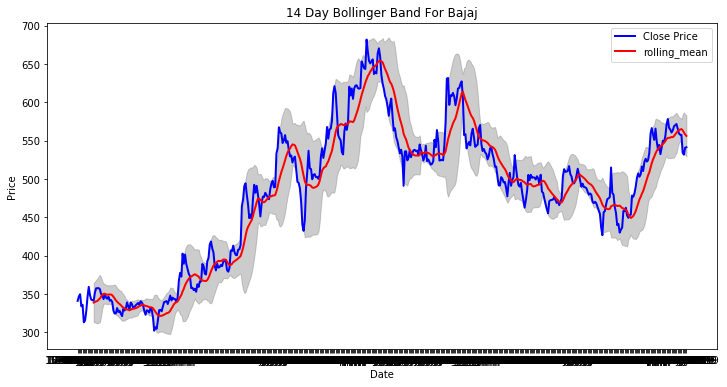

In [41]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

ax.fill_between(df2['Date'], df2['Upper Band'], df2['Lower Band'], color='grey',alpha=0.4)
ax.plot(df2['Date'], df2['Close Price'], color='blue', lw=2)
ax.plot(df2['Date'], df2['rolling_mean'], color='red', lw=2)

# Set Title & Show the Image
ax.set_title('14 Day Bollinger Band For Bajaj')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show();